# ALERT Doctoral School 2023
## Hands-on Generalized Policy Iteration for the Miner game
### Authors: Alexandros Stathas, Diego Gutierrez-Oribio, Ioannis Stefanou

In this code, you can train a Generalized Policy Iteration with the Q-values to solve the Miner game on a 4x4 grid.

#### Main Libraries

In [1]:
from Miner_v1 import Miner
from plotter import plot_env, plot_arrows 
import numpy as np
import matplotlib.pyplot as plt

#### Initialization of the Miner environment

In [2]:
env = Miner(desc=["FFFG", "FFFF", "FFFF", "HSFF"], is_slippery=False, render_mode="ansi")
env.reset()

num_states = env.observation_space.n
num_actions = env.action_space.n

(13, {'prob': 1})

#### Initialization of the Q-values arbitrarily

In [3]:
Q = np.zeros((num_states, num_actions))

#### Training hyperparameters

In [12]:
gamma = 0.9 #Discount factor
n_steps = 500 #Steps

#### Generalized Policy Iteration

In [13]:
for _ in range(n_steps):  
    # Policy Evaluation
    for s in range(num_states):
        for a in range(num_actions):
            q = 0
            for prob, next_state, reward, _ in env.P[s][a]:
                q += prob * (reward + gamma * np.max(Q[next_state]))
            Q[s][a] = q
    
    # Policy Improvement
    policy_stable = True
    optimal_policy = np.argmax(Q, axis=1)
    for s in range(num_states):
        old_action = optimal_policy[s]
        new_action = np.argmax([sum(prob * (reward + gamma * np.max(Q[next_state])) for prob, next_state, reward, _ in env.P[s][a]) for a in range(num_actions)])
        if old_action != new_action:
            policy_stable = False
            optimal_policy[s] = new_action
    
    if policy_stable:
        break

#### Results

Final Q-values:
 [[ 62.9    65.61   81.     62.9  ]
 [ 72.9    72.9    90.     71.   ]
 [ 81.     81.    100.     80.   ]
 [  0.      0.      0.      0.   ]
 [ 55.61   59.049  72.9    72.9  ]
 [ 65.61   65.61   81.     81.   ]
 [ 72.9    72.9    90.     90.   ]
 [ 81.     81.     80.    100.   ]
 [ 49.049 -20.     65.61   65.61 ]
 [ 59.049  59.049  72.9    72.9  ]
 [ 65.61   65.61   81.     81.   ]
 [ 72.9    72.9    71.     90.   ]
 [  0.      0.      0.      0.   ]
 [-20.     49.049  65.61   65.61 ]
 [ 59.049  55.61   72.9    72.9  ]
 [ 65.61   62.9    62.9    81.   ]]


Optimal Policy:



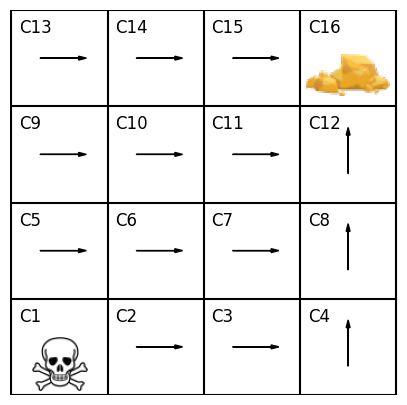

In [23]:
print("Final Q-values:\n", Q); print("\n")
print("Optimal Policy:\n")
game_actions_to_plotter_arrows = {'0': 2, '1': 1, '3':3, '2':4}
policy_arrow_compatible =np.array([game_actions_to_plotter_arrows[key] for key in np.array(optimal_policy,dtype="<U3")],dtype=np.int32)
policy_arrow_compatible=policy_arrow_compatible.reshape((-1,4))[::-1,:].reshape((16))
M=4;Lx=5;Ly=5
fig, ax = plt.subplots()
plot_env(fig,ax,M,Lx,Ly)
plot_arrows(fig,ax,policy_arrow_compatible,M,Lx,Ly)
plt.show()

In [15]:
def Dictionary(s):
    return optimal_policy[s]

#### Testing of your policy in the Miner game

In [17]:
# Create the Miner environment with custom map and no slipperiness
env_test = Miner(desc=["FFFG", "FFFF", "FFFF", "HSFF"], is_slippery=False, render_mode="human")
env_test.reset()

# Lists to store states, actions, rewards, and dones during the play
states = np.zeros(6)
states[0] = 13
actions, rewards, dones = [], [], []

def show_state(obs):
    # Render the environment using matplotlib
    env_test.render()
    # Pause for a short time to allow the plot to update
    plt.pause(0.01)

for index in range(5):
    action = Dictionary(int(states[index]))
    obs_tp1, rew, done, _ = env_test.step(action)[:4] 

    # Append the states, actions, rewards, and dones to the lists
    states[index+1]=obs_tp1
    actions.append(action)
    rewards.append(rew)
    dones.append(done)  

    # Show the updated state of the environment
    show_state(obs_tp1)

    if done == True:
        if rew > 0:
            print("Congratulations! You reached the gold!")
        else:
            print("Oops! You fell into a hole!")
            
# Print the information after the game ends
print("Total number of moves:", np.size(rewards))
print("Final reward:", int(sum(rewards)))
    
# Close the environment after finishing the game
env_test.close()

Congratulations! You reached the gold!
Total number of moves: 5
Final reward: 100
